In [35]:
import pandas as pd
from pandas import Grouper, DataFrame
from pandas.plotting import autocorrelation_plot

import numpy as np
import os
from datetime import datetime
from typing import List

from matplotlib import pyplot as plt
import seaborn

### Constantes

In [2]:
DIR_DATASET: str = os.path.join('datasets', 'dados-gerados')

DATASET_OEC_MPME = os.path.join(DIR_DATASET,  'oec_mpme.csv')

DAT_CORRENTE = datetime.today().strftime("%Y-%m-%d")

In [7]:
df_oec_mpme = pd.read_csv(DATASET_OEC_MPME, sep=';', decimal=',', parse_dates=True)

In [9]:
df_oec_mpme.index = pd.DatetimeIndex(df_oec_mpme.data_base)

In [10]:
df_oec_mpme.head()

,ano,mes,data_base,desembolso,vendas,aprovacao,ind_atv_econ,tx_pre_prazo_medio,A_DI_12,A_DI_24,A_DI_36,A_DI_60,A_DI_120,custo_bndes
data_base,,,,,,,,,,,,,,
2009-10-01,2009,10,2009-10-01,1388.5,13123.0,1437.057832,129.74,12.796206,9.969168,11.560462,12.282385,12.869093,13.306142,4.0
2009-11-01,2009,11,2009-11-01,1339.9,13219.0,1497.107343,130.17,13.062494,9.984419,11.687233,12.488141,13.121518,13.574884,4.0
2009-12-01,2009,12,2009-12-01,1259.6,15104.0,1580.255803,131.36,13.233439,10.341847,11.944138,12.657941,13.269531,13.789337,4.0
2010-01-01,2010,1,2010-01-01,1682.7,11569.0,1853.163058,133.46,13.156129,10.452661,11.913480,12.576683,13.181880,13.728600,4.0
2010-02-01,2010,2,2010-02-01,1160.7,9581.0,1774.880889,135.16,12.657825,10.542231,11.700107,12.198329,12.711503,13.446076,4.0


<AxesSubplot:xlabel='data_base'>

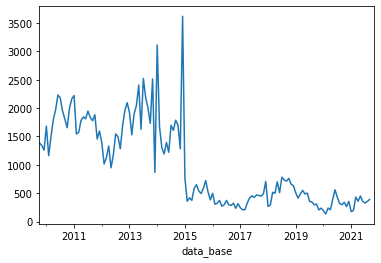

In [11]:
df_oec_mpme.desembolso.plot()

#### Agrupamento por ano

<AxesSubplot:>

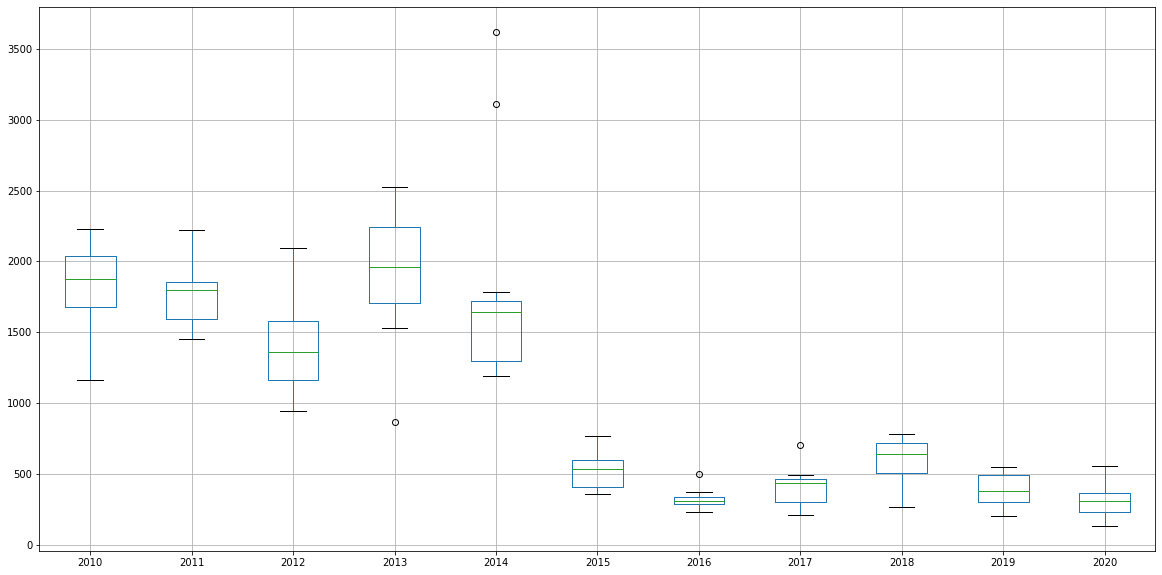

In [34]:
#retirando 2009 porque esta incompleto
plt.figure(figsize=(20,10))

ser_desembolso = df_oec_mpme[(df_oec_mpme.data_base >= '2010-01-01') & (df_oec_mpme.data_base <= '2020-12-01')].desembolso
groups = ser_desembolso.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()

#### Histogram

<AxesSubplot:>

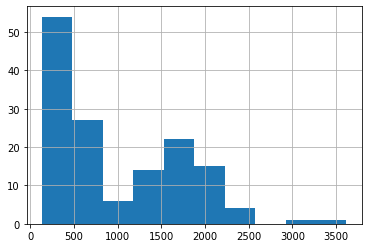

In [21]:
ser_desembolso = df_oec_mpme.desembolso
ser_desembolso.hist()

<AxesSubplot:ylabel='Density'>

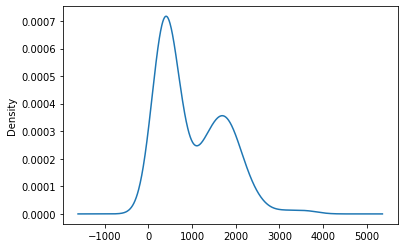

In [22]:
ser_desembolso.plot(kind='kde')

#### Autocorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

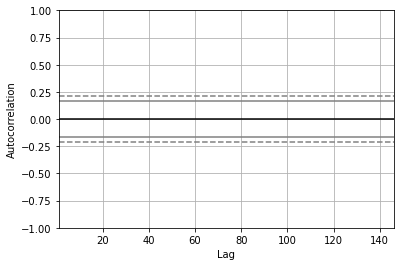

In [36]:
ser_desembolso = df_oec_mpme.desembolso
autocorrelation_plot(ser_desembolso)